In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2025-06-08 02:15:51.741694: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749348951.944188      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749348952.001839      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


['Cancer', 'Normal']
Chargement des images depuis : /kaggle/input/breast-mamography-2-classe/breact_mamography_2/train
  → Classe Cancer : 2712 images
  → Classe Normal : 2197 images
['Cancer', 'Normal']
Chargement des images depuis : /kaggle/input/breast-mamography-2-classe/breact_mamography_2/test
  → Classe Cancer : 56 images
  → Classe Normal : 96 images
['Cancer', 'Normal']
Chargement des images depuis : /kaggle/input/breast-mamography-2-classe/breact_mamography_2/valid
  → Classe Cancer : 40 images
  → Classe Normal : 175 images


I0000 00:00:1749349002.777922      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Résumé du modèle :


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 48)   │          1,296 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 48)   │            192 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 48)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 48)   │            432 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 48)   │            192 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 48)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 48)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 48)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 12)       │            588 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 18,134,369 (69.18 MB)

 Trainable params: 18,008,650 (68.70 MB)

 Non-trainable params: 125,719 (491.09 KB)

Poids de classe : {0: 0.9407441433164906, 1: 1.0672225117248566}


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1749349116.124252      95 service.cc:148] XLA service 0x7e5044003f40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749349116.125246      95 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1749349125.999338      95 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1749349140.841585      95 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1749349141.026950      95 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1749349141.372618      95 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1749349141.5634

128/128 ━━━━━━━━━━━━━━━━━━━━ 234s 511ms/step - accuracy: 0.8715 - loss: 0.3175 - val_accuracy: 0.5600 - val_loss: 1.2674 - learning_rate: 1.0000e-04
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 44s 342ms/step - accuracy: 0.9893 - loss: 0.0339 - val_accuracy: 0.5600 - val_loss: 1.4853 - learning_rate: 1.0000e-04
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 44s 341ms/step - accuracy: 0.9952 - loss: 0.0130 - val_accuracy: 0.8078 - val_loss: 0.4131 - learning_rate: 1.0000e-04
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 45s 347ms/step - accuracy: 0.9939 - loss: 0.0183 - val_accuracy: 0.8546 - val_loss: 0.3843 - learning_rate: 1.0000e-04
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 44s 338ms/step - accuracy: 0.9979 - loss: 0.0058 - val_accuracy: 0.9756 - val_loss: 0.0652 - learning_rate: 1.0000e-04
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 44s 344ms/step - accuracy: 0.9980 - loss: 0.0061 - val_accuracy: 0.9932 - val_loss: 0.0207 - learning_rate: 1.0000e-04
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 45s 353ms/step -

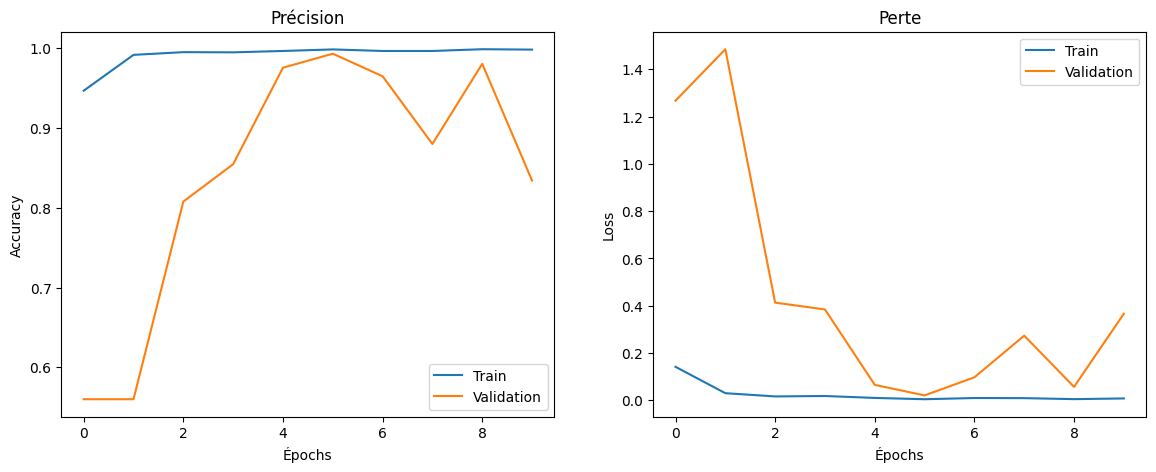

5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step


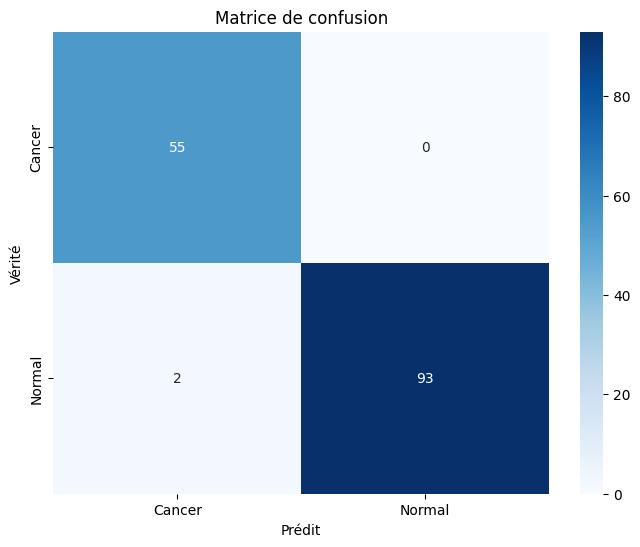

              precision    recall  f1-score   support

      Cancer       0.96      1.00      0.98        55
      Normal       1.00      0.98      0.99        95

    accuracy                           0.99       150
   macro avg       0.98      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



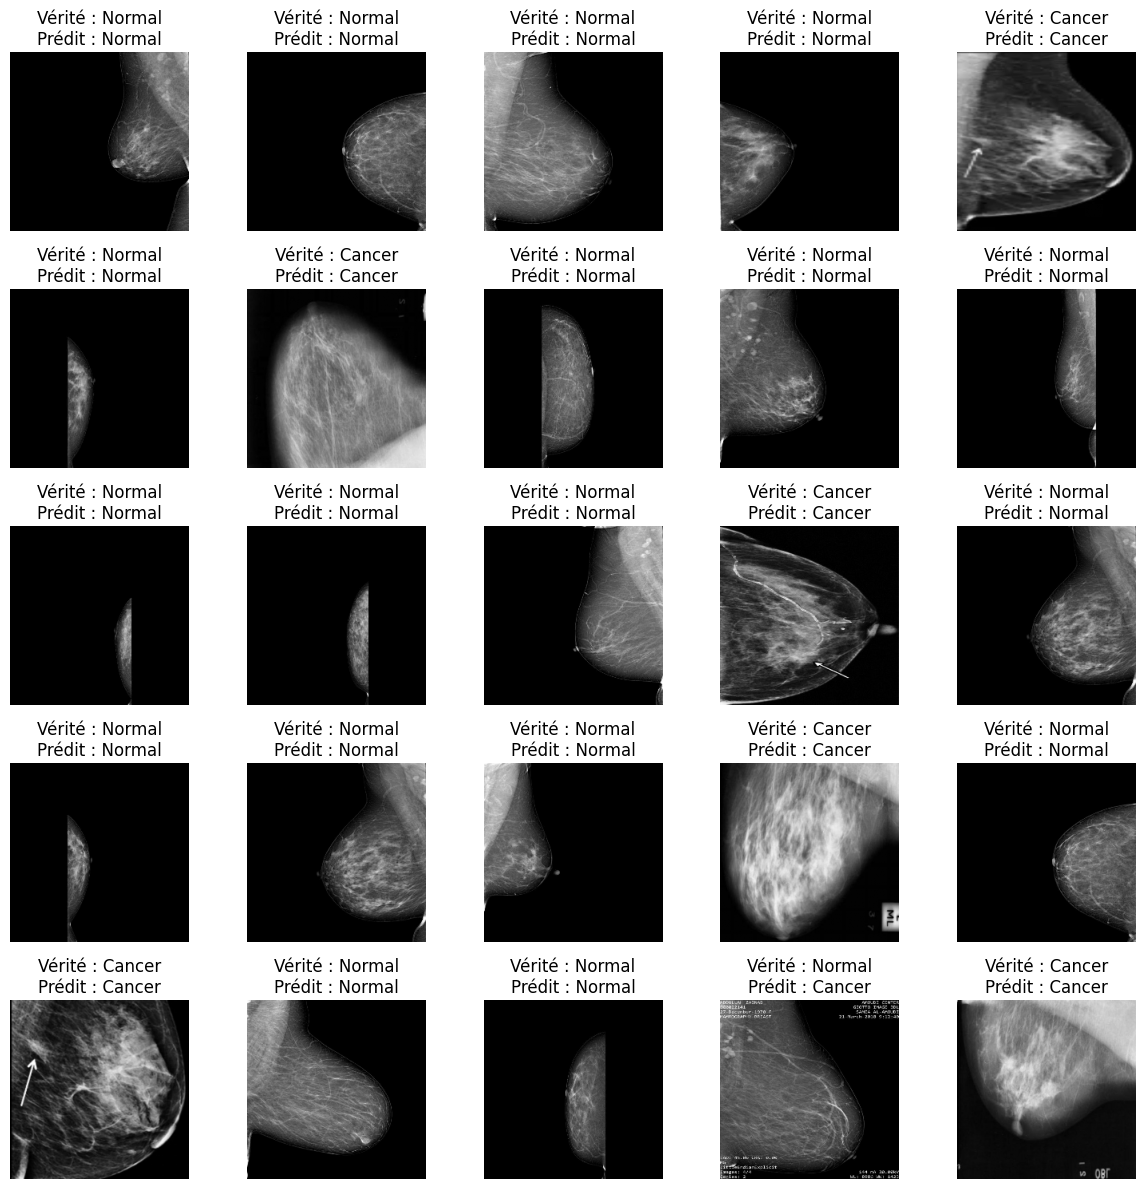

✅ Programme terminé avec succès.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from keras.applications import EfficientNetB4
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf

# Répertoires d'images
train_dir = "/kaggle/input/breast-mamography-2-classe/breact_mamography_2/train"
test_dir = "/kaggle/input/breast-mamography-2-classe/breact_mamography_2/test"
val_dir = "/kaggle/input/breast-mamography-2-classe/breact_mamography_2/valid"

img_size = 224

# Chargement des images et des étiquettes multiclasse
def load_images_labels(directory):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))
    print(class_names)
    label_map = {name: idx for idx, name in enumerate(class_names)}
    print(f"Chargement des images depuis : {directory}")
    for label in class_names:
        path = os.path.join(directory, label)
        print(f"  → Classe {label} : {len(os.listdir(path))} images")
        for file in os.listdir(path):
            img_path = os.path.join(path, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (img_size, img_size))
                img_rgb = cv2.merge([img]*3)
                images.append(img_rgb)
                labels.append(label_map[label])
    return np.array(images) / 255.0, np.array(labels), class_names

# Étape 1 : Chargement des jeux de données
X_train, y_train, class_names = load_images_labels(train_dir)
X_test, y_test, _ = load_images_labels(test_dir)
X_val, y_val, _ = load_images_labels(val_dir)

num_classes = len(class_names)

# Fusion des ensembles d'entraînement et de validation
X_total = np.concatenate((X_train, X_val), axis=0)
y_total = np.concatenate((y_train, y_val), axis=0)
X_train, X_val, y_train, y_val = train_test_split(X_total, y_total, test_size=0.2, random_state=42)

# Étape 2 : Construction du modèle EfficientNetB4
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

print("Résumé du modèle :")
model.summary()

# Étape 3 : Compilation du modèle
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Étape 4 : Préparation des données (augmentation)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Étape 5 : Calcul des poids de classe
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
print(f"Poids de classe : {class_weights}")

# Étape 6 : Définition des callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)
]

# Étape 7 : Lancement de l'entraînement
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    callbacks=callbacks
)

# Étape 8 : Sauvegarde du modèle entraîné
model.save("efficientnet_multiclass_model.h5")
print("✅ Modèle sauvegardé sous le nom : efficientnet_multiclass_model.h5")

# Étape 9 : Évaluation sur les données de test
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Précision sur le test : {accuracy*100:.2f}%")

# Étape 10 : Affichage des courbes d'apprentissage
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Précision')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Perte')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Étape 11 : Prédictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Étape 12 : Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prédit')
plt.ylabel('Vérité')
plt.title('Matrice de confusion')
plt.show()

# Étape 13 : Rapport de classification
print(classification_report(y_test, y_pred, target_names=class_names))

# Étape 14 : Affichage de quelques exemples de prédictions
plt.figure(figsize=(12,12))
for i in range(25):
    idx = np.random.randint(0, len(X_test))
    img = X_test[idx]
    true_label = class_names[y_test[idx]]
    pred_label = class_names[y_pred[idx]]
    plt.subplot(5,5,i+1)
    plt.imshow(img)
    plt.title(f"Vérité : {true_label}\nPrédit : {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

print("✅ Programme terminé avec succès.")